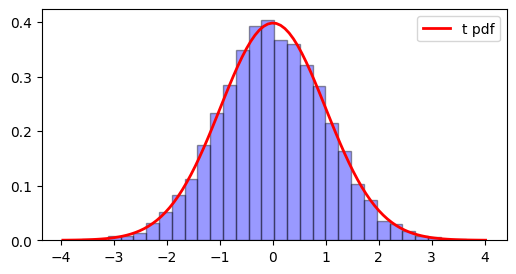

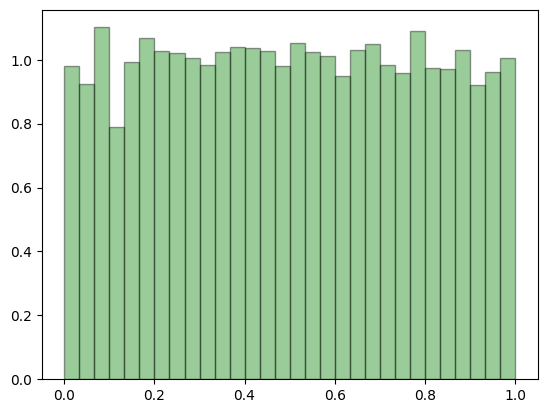

In [ ]:
# generate a sample of size n1 from a normal distribution with mean mu1 and standard deviation sigma1
import numpy as np
from scipy import stats as stat
import matplotlib.pyplot as plt

mu1, sigma1, n1 = 0, 1, 100
mu2, sigma2, n2 = 0, 1, 100
N = 10000

X1 = stat.norm.rvs(loc=mu1, scale=sigma1, size=(n1, N))
X2 = stat.norm.rvs(loc=mu2, scale=sigma2, size=(n2, N))
T = (X1.mean(axis=0) - X2.mean(axis=0)) / \
    np.sqrt(X1.var(axis=0, ddof=1) / n1 + X2.var(axis=0, ddof=1) / n2)
Pvalue = 2 * stat.t.cdf(-abs(T), df=n1+n2-2)
# T = np.zeros(N)
# for i in range(N):
#     x1 = stat.norm.rvs(loc=mu1, scale=sigma1, size=n1)
#     x2 = stat.norm.rvs(loc=mu2, scale=sigma2, size=n2)
#     t = (x1.mean() - x2.mean()) / \
#     np.sqrt(x1.var(ddof=1) / n1 + x2.var(ddof=1) / n2)
#     T[i] = t

fig = plt.figure(figsize=(6,3))
plt.hist(T, bins=30, density=True, alpha=0.4, color='b', edgecolor='k')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = stat.t.pdf(x, df=n1+n2-2)
plt.plot(x, y, 'r-', lw=2, label='t pdf')
plt.legend()    
plt.show()

fig = plt.figure(figsize=(6,3))
plt.hist(Pvalue, bins=30, density=True, alpha=0.4, color='g', edgecolor='k')
plt.show()

In [70]:
import numpy as np
from scipy import stats as stat
import matplotlib.pyplot as plt

mu1, sigma1, n1 = 0, 1, 100
mu2, sigma2, n2 = 0, 1, 100

x1 = stat.norm.rvs(loc=mu1, scale=sigma1, size=n1)
x2 = stat.norm.rvs(loc=mu2, scale=sigma2, size=n2)
t = (x1.mean() - x2.mean()) / \
    np.sqrt(x1.var(ddof=1) / n1 + x2.var(ddof=1) / n2)  

pvalue = 2 * stat.t.cdf(-abs(t), df=n1+n2-2)
print(f't-statistic: {t}, p-value: {pvalue}')


t-statistic: 1.353439752811509, p-value: 0.177458269379795


In [ ]:
# calculate the p-value for a two-tailed test
p_value = 2 * min(np.mean(T <= 0), np.mean(T >= 0))
print(f'P-value: {p_value}')